In [4]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA on Driver Acceptance Data

In [7]:
pay_df = pd.read_csv('datasets/driverAcceptanceData - driverAcceptanceData.csv', index_col=0)
pay_df['profit'] = 30.0 - pay_df['PAY']

pay_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PAY       1000 non-null   float64
 1   ACCEPTED  1000 non-null   int64  
 2   profit    1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 31.2 KB


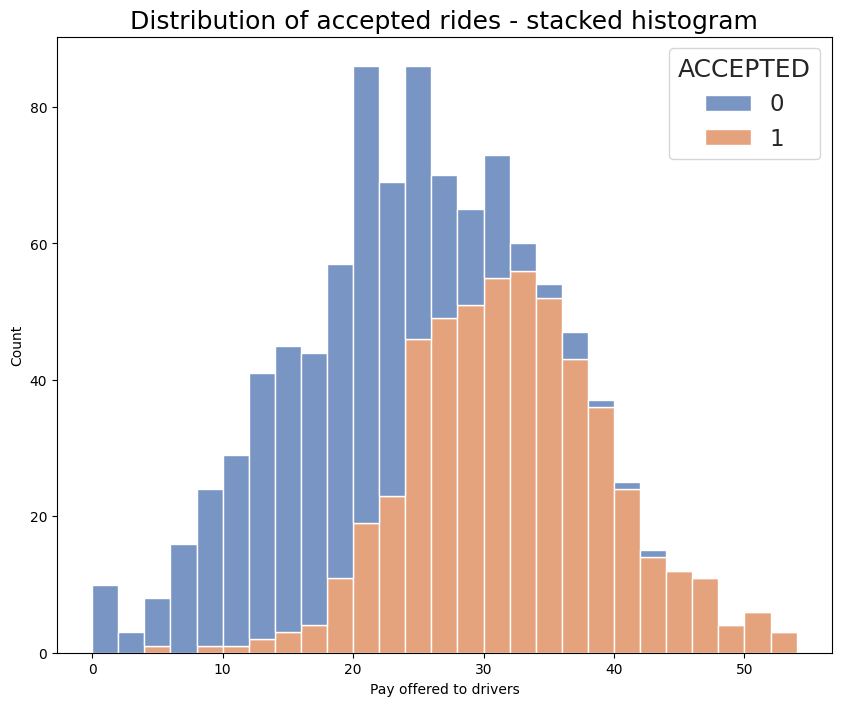

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
ax = sns.histplot(data=pay_df, x = 'PAY', hue='ACCEPTED', multiple='stack', binwidth = 2)

ax.set(xlabel='Pay offered to drivers', ylabel='Count', title="Distribution of accepted rides - stacked histogram")
plt.show()

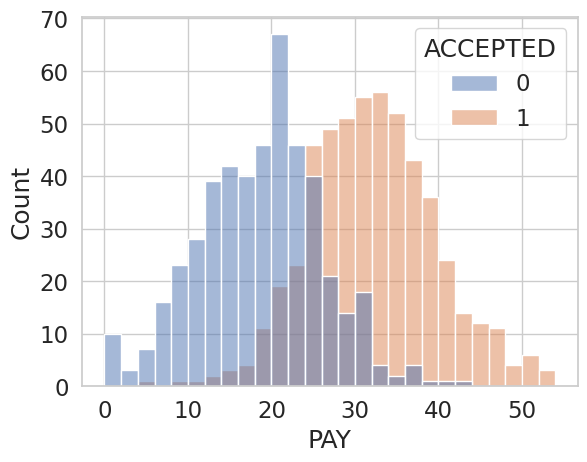

In [10]:
sns.histplot(data=pay_df, x = 'PAY', hue='ACCEPTED', binwidth = 2)
plt.show()

In [11]:
pay_df.describe()

,PAY,ACCEPTED,profit
count,1000.000000,1000.00000,1000.000000
mean,25.713530,0.52700,4.286470
std,10.051410,0.49952,10.051410
min,0.000000,0.00000,-23.667563
25%,18.878792,0.00000,-2.825641
50%,25.483059,1.00000,4.516941
75%,32.825641,1.00000,11.121208
max,53.667563,1.00000,30.000000


In [12]:
pay_range = np.arange(0,56,2)
print('pay_range: ',pay_range)

pay_cut = pd.cut(pay_df['PAY'], pay_range, include_lowest=True)

pay_df['pay_range']= pay_cut

accepted = pay_df[pay_df['ACCEPTED']==1]
rejected = pay_df[pay_df['ACCEPTED']==0]

mean= pay_df.groupby(['pay_range']).mean()
counts = pay_df.groupby(['pay_range']).count()
# print(mean)
# print(counts)

pay_range:  [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54]


In [13]:
revenue_df = np.round(accepted.groupby(['pay_range']).sum(), 2)

grouped_df = np.round(mean[['PAY', 'ACCEPTED']], 3)

grouped_df['pay_range lower']= pay_range[:-1]
grouped_df['pay_range upper']= pay_range[1:]
grouped_df['pay_range center'] = (pay_range[:-1] + pay_range[1:])/2

grouped_df.rename({"PAY": "Avg Pay", "ACCEPTED": "Acceptance Rate"}, axis=1, inplace=True)

grouped_df['Revenue']= revenue_df['PAY']
grouped_df['Profit']= revenue_df['profit']
grouped_df['Accepted Rides']= revenue_df['ACCEPTED']
grouped_df['Ride Requests'] = counts['ACCEPTED']
grouped_df['Profit/Ride'] = np.round(grouped_df['Profit']/grouped_df['Accepted Rides'], 3)
grouped_df['Profit/Request'] =np.round( grouped_df['Profit']/grouped_df['Ride Requests'] ,3)
# Note that Profit/Request = Acceptance_rate * Profit/Ride


In [14]:
grouped_df

,Avg Pay,Acceptance Rate,pay_range lower,pay_range upper,pay_range center,Revenue,Profit,Accepted Rides,Ride Requests,Profit/Ride,Profit/Request
pay_range,,,,,,,,,,,
"(-0.001, 2.0]",0.268,0.000,0,2,1.0,0.00,0.00,0,10,NaN,0.000
"(2.0, 4.0]",3.579,0.000,2,4,3.0,0.00,0.00,0,3,NaN,0.000
"(4.0, 6.0]",4.971,0.125,4,6,5.0,5.40,24.60,1,8,24.600,3.075
"(6.0, 8.0]",6.935,0.000,6,8,7.0,0.00,0.00,0,16,NaN,0.000
"(8.0, 10.0]",9.077,0.042,8,10,9.0,9.00,21.00,1,24,21.000,0.875
"(10.0, 12.0]",11.026,0.034,10,12,11.0,11.59,18.41,1,29,18.410,0.635
"(12.0, 14.0]",13.085,0.049,12,14,13.0,25.21,34.79,2,41,17.395,0.849
"(14.0, 16.0]",14.979,0.067,14,16,15.0,45.78,44.22,3,45,14.740,0.983
"(16.0, 18.0]",16.864,0.091,16,18,17.0,67.75,52.25,4,44,13.062,1.188


In [15]:
# grouped_df.to_csv('driver_acceptance_data_binwidth5.csv')

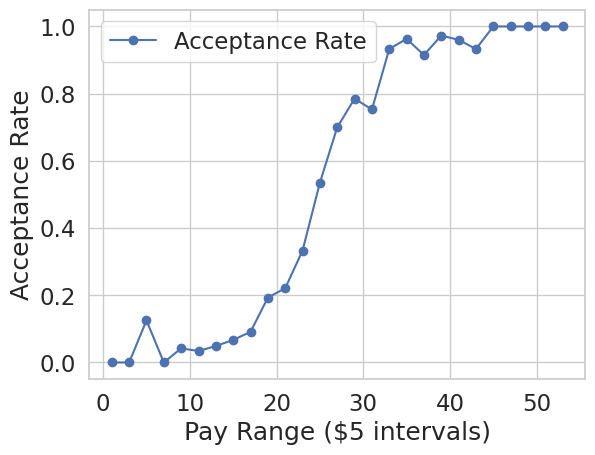

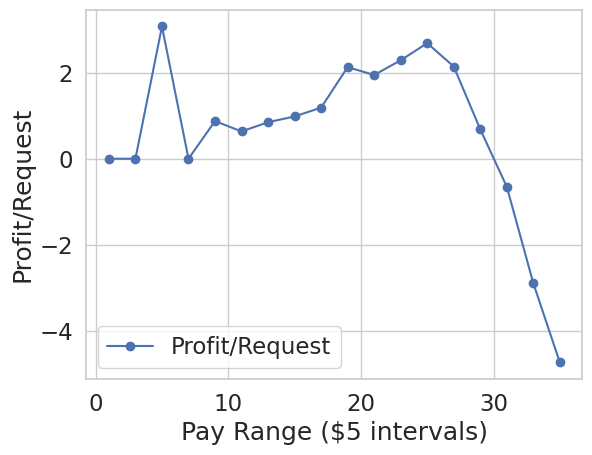

In [16]:
grouped_df.plot(y='Acceptance Rate', x='pay_range center', 
                marker='o', xlabel='Pay Range ($5 intervals)', ylabel= 'Acceptance Rate')
plt.grid(True)

grouped_df[:18].plot(y='Profit/Request', x='pay_range center', 
                marker='o', xlabel='Pay Range ($5 intervals)', ylabel= 'Profit/Request')
plt.grid(True)

In [17]:
# Checks and balances
print(grouped_df['Revenue'].sum())
print(grouped_df['Ride Requests'].sum())

16904.06
1000


In [18]:
#Modelling acceptance rate

# extracting raw data from grouped_df
x, y = grouped_df['pay_range center'].to_numpy(), grouped_df['Acceptance Rate'].to_numpy()

def sigmoid(x, x0=-24.85, x_scale=0.27):
    return 1.0/(1.0+np.exp(-(x + x0)*x_scale) )

x_s = np.arange(0,55,0.1)
y_s = sigmoid(x_s, -25,  0.25)

from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, x, y, p0=(-25.0, 0.25))

print(popt)
print(np.diag(pcov)**2)

x_s = np.arange(0,55,0.1)
y_s = sigmoid(x_s, popt[0], popt[1])

fig, ax = plt.subplots(figsize=(10,8))

plt.plot(x_s, y_s, '--', label='sigmoid model fit', lw=3)  # fit model
plt.plot(x,y, 'o', label='raw data', ms=8, lw=1)  # raw data
plt.xlabel('Pay Range ($2 interval)')
plt.ylabel('Acceptance rate of drivers')
plt.legend()
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'scipy'

[-1.88999784e-10  4.82348436e-08 -5.45608734e-06  3.59796495e-04
 -1.52994489e-02  4.37816352e-01 -8.52913179e+00  1.11572729e+02
 -9.37021477e+02  4.55813701e+03 -9.74510262e+03]


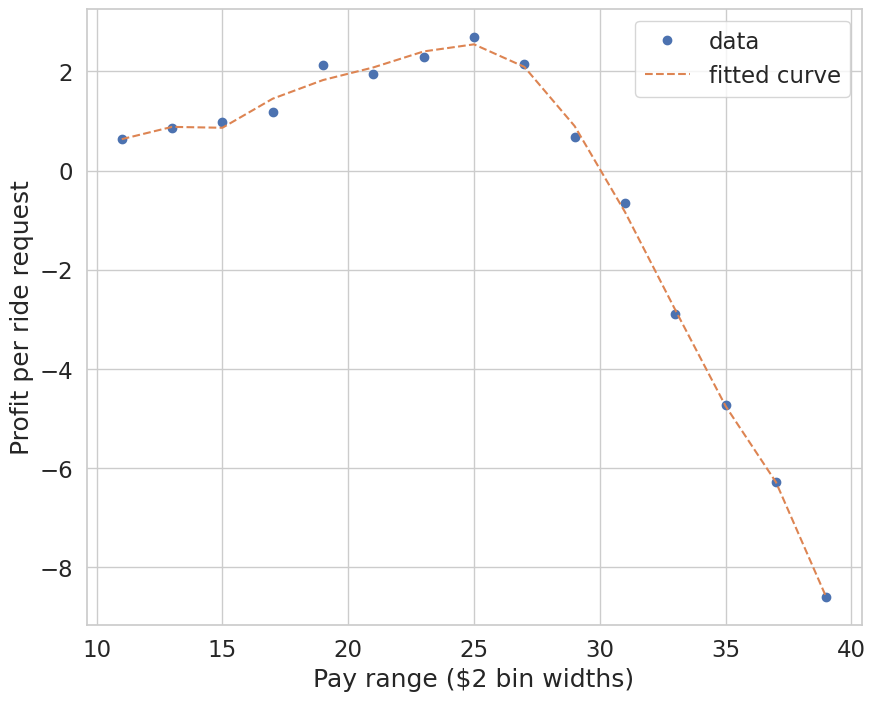

In [19]:
# Modelling profit/request

xf, yf = grouped_df['pay_range center'].to_numpy(), grouped_df['Profit/Request'].to_numpy()

x = xf[5:20]
y = yf[5:20]

z = np.polyfit(x,y,10)
print(z)
profit_pay_model = np.poly1d(z)

fig, ax = plt.subplots(figsize=(10,8))

n_end = 18
plt.plot(x,y, 'o', label='data')
plt.plot(x, profit_pay_model(x), '--', label='fitted curve')
plt.ylabel('Profit per ride request')
plt.xlabel('Pay range ($2 bin widths)')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
# FINAL MODEL

# copy and pasted from the line above
def acceptance_rate_model(x, x0=-24.85, x_scale=0.27):
    return 1.0/(1.0+np.exp(-(x + x0)*x_scale) )

pay = 25 # input pay for drivers

print('Profit/Request:' , profit_pay_model(pay))
print('Acceptance Rate:', acceptance_rate_model(25))

Profit/Request: 2.544164592256493
Acceptance Rate: 0.5101236162660289


## Average pay per ride

In [21]:
accepted = pay_df[pay_df['ACCEPTED']==1]
rejected = pay_df[pay_df['ACCEPTED']==0]

accepted['PAY'].mean()

32.07604769982543

In [22]:
c = accepted['ACCEPTED'].count()
s = accepted['PAY'].sum()

# Simulate rider requests with Poisson statistics

In [24]:
from scipy.stats import poisson
from scipy.stats import norm

[5 3 3 8 3]


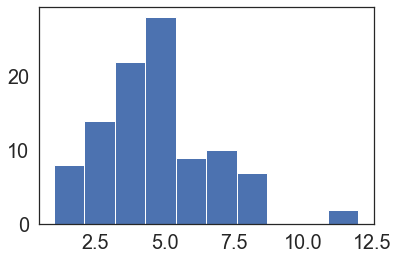

[ 0 10 96]


In [ ]:
# Playing with poisson.rvs, random number generator based on the poisson distribution

random_poisson = poisson.rvs(mu=5, size=100)

print(random_poisson[:5])

fig, ax = plt.subplots(1,1)
ax.hist(random_poisson)
plt.show()

print(poisson.rvs(mu=[1,10,100], size=3))

In [ ]:
random_poisson

array([ 5,  3,  3,  8,  3,  8,  2,  1,  4,  2,  3,  3,  1,  5,  3,  2,  3,
        8,  4,  5, 11,  8,  3,  4,  6,  4,  5,  3,  5,  3,  5,  4,  7,  4,
        4,  5,  5,  5,  7,  4,  3,  6,  7,  3,  5,  4, 12,  7,  4,  5,  5,
        7,  6,  7,  5,  4,  6,  5,  5,  7,  7,  5,  6,  2,  5,  4,  4,  4,
        3,  6,  2,  7,  8,  5,  4,  6,  5,  5,  4,  5,  5,  4,  4,  4,  7,
        4,  5,  8,  4,  3,  5,  6,  5,  5,  8,  6,  2,  4,  5,  5])

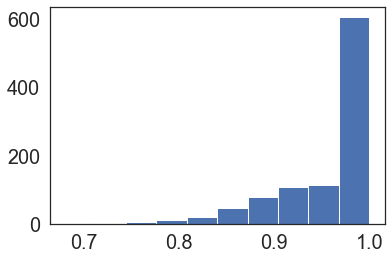

In [ ]:
# capped_norm function creates a normal distrubtion with in the bounds [0,1]
# this is for simulating the acceptance rate that is used later

def capped_norm(mu = 0.25, size = 1000):
    random_norm = norm.rvs(mu, scale=0.1, size=size)
    capped = np.zeros(len(random_norm))
    for i, r in enumerate(random_norm):
        if r > 1:
            capped[i] = 1
        elif r < 0:
            capped[i] = 0
        else:
            capped[i] = r
            
    return capped
               
fig, ax = plt.subplots()
ax.hist(capped_norm(1, 1000))
plt.show()

In [ ]:
n_months=12
def simulate_riders_array(n_riders=1000, init_mu=1, n_months=12, acceptance_rate=np.ones(n_months)*1.0, random_seed=None):
    
    rider_array = np.zeros((n_riders, n_months)) # initializing array
    initial_requests = poisson.rvs(mu=np.ones(n_riders)*init_mu, size=n_riders, random_state=random_seed)
#     initial_matches = (np.rint(initial_requests * acceptance_rate[0])).astype(int)
    initial_matches = np.rint(initial_requests * capped_norm(acceptance_rate[0], n_riders))
    rider_array[:,0] = initial_matches
    
    for m in range(n_months)[1:n_months]:
        requests = poisson.rvs(mu = rider_array[:,m-1], size=n_riders, random_state=random_seed)
        matches = requests * capped_norm(acceptance_rate[m], n_riders)
#         rider_array[:,m] = matches
        rider_array[:,m] = np.rint(matches)
    
    return (np.rint(rider_array)).astype(int)


In [ ]:
rides_array = simulate_riders_array()

In [ ]:
rides_array 

array([[2, 1, 3, ..., 6, 7, 5],
       [3, 0, 0, ..., 0, 0, 0],
       [2, 3, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [2, 3, 2, ..., 9, 9, 4],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# testing the simulation

driverpay = np.array([30,30,30,30,30,28,28,28,25,25,25,25])
AR = sigmoid(driverpay)
rides_sim = simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*1.0)

# print(rides_sim[:20,:])

df_rides = pd.DataFrame(rides_sim)
total_rides = df_rides.sum()
first_month = df_rides[0]


print(total_rides.values)
riderpay = 35
profit = total_rides.values*(riderpay-driverpay)
print(profit)
print(profit.sum())

driverpay = np.array([35,35,35,32,30,28,28,28])
print(sigmoid(driverpay))
print(type(sigmoid(driverpay)))

[943 900 888 867 822 776 726 698 709 663 665 624]
[4715 4500 4440 4335 4110 5432 5082 4886 7090 6630 6650 6240]
64110
[0.93937458 0.93937458 0.93937458 0.87330475 0.80067205 0.70067202
 0.70067202 0.70067202]
<class 'numpy.ndarray'>


In [ ]:
rides_sorted = df_rides.sort_values(by=11, ascending = False)
# print(rides_sorted.info())
print(rides_sorted.describe().loc['std'])
# print(rides_sorted)

0     0.972984
1     1.341566
2     1.633439
3     1.796257
4     1.869174
5     1.937932
6     2.049665
7     2.121626
8     2.302960
9     2.316203
10    2.484945
11    2.516934
Name: std, dtype: float64


In [ ]:
rides_sorted

,0,1,2,3,4,5,6,7,8,9,10,11
728,5,6,5,6,6,6,4,4,5,5,3,3
378,5,8,7,3,1,1,0,0,0,0,0,0
898,4,5,5,3,4,2,0,0,0,0,0,0
254,4,7,8,12,17,23,20,22,22,28,32,29
834,4,2,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
398,0,0,0,0,0,0,0,0,0,0,0,0
399,0,0,0,0,0,0,0,0,0,0,0,0
682,0,0,0,0,0,0,0,0,0,0,0,0
681,0,0,0,0,0,0,0,0,0,0,0,0


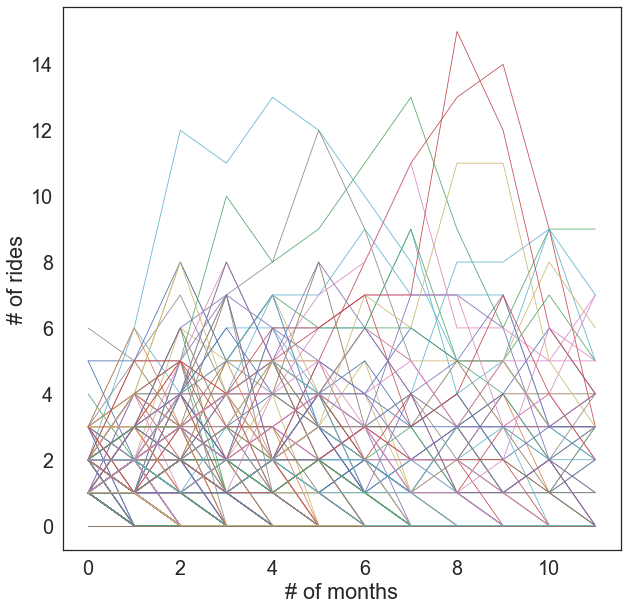

In [ ]:
# Plotting the random walk, not very useful TBH

rides_sim = simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*0.9)

fig, ax = plt.subplots(figsize=(10,10))

for rs in rides_sim[:500]:
    plt.plot(rs, linewidth=0.8)
plt.ylabel('# of rides')
plt.xlabel('# of months')    
plt.show()

In [ ]:
# Creating the ride_stats DataFrame and storing it as csv

ride_stats = pd.DataFrame(index=np.arange(5))
# print(ride_stats)
for i in np.arange(0,12):
    print(i)
    
    ride_stats = pd.merge(ride_stats, df_rides[i].value_counts(sort=False), how='outer', left_index=True, right_index=True)
    
# ride_stats.to_csv('ride_stats_AR75.csv')

0
1
2
3
4
5
6
7
8
9
10
11


       0      1      2      3      4      5      6      7      8      9  \
0  362.0  537.0  635.0  688.0  725.0  754.0  782.0  804.0  820.0  834.0   
1  382.0  193.0  119.0   74.0   64.0   56.0   38.0   38.0   31.0   32.0   
2  176.0  131.0   91.0   75.0   59.0   56.0   48.0   32.0   32.0   26.0   
3   61.0   78.0   67.0   56.0   51.0   40.0   35.0   28.0   30.0   22.0   
4   14.0   32.0   44.0   42.0   33.0   21.0   24.0   30.0   18.0   24.0   

      10     11  
0  851.0  863.0  
1   22.0   23.0  
2   23.0   22.0  
3   22.0   15.0  
4   19.0   15.0  


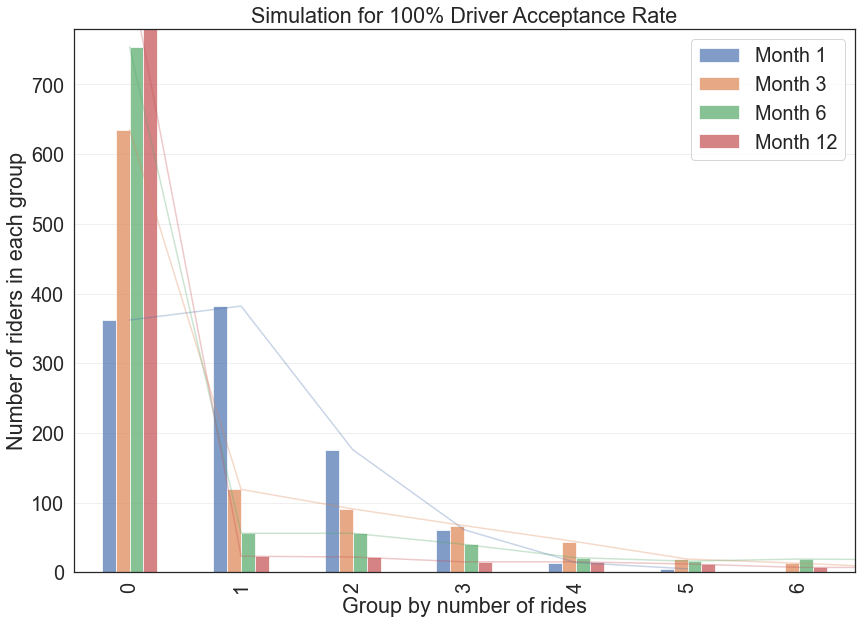

       0    1    2      3      4      5      6      7      8      9     10  \
0  545.0  785  898  947.0  969.0  991.0  995.0  997.0  998.0  999.0  999.0   
1  408.0  179   85   46.0   27.0    8.0    2.0    1.0    1.0    1.0    1.0   
2   45.0   32   13    6.0    4.0    1.0    3.0    2.0    1.0    NaN    NaN   
3    2.0    3    3    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    NaN    1    1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      11  
0  999.0  
1    1.0  
2    NaN  
3    NaN  
4    NaN  


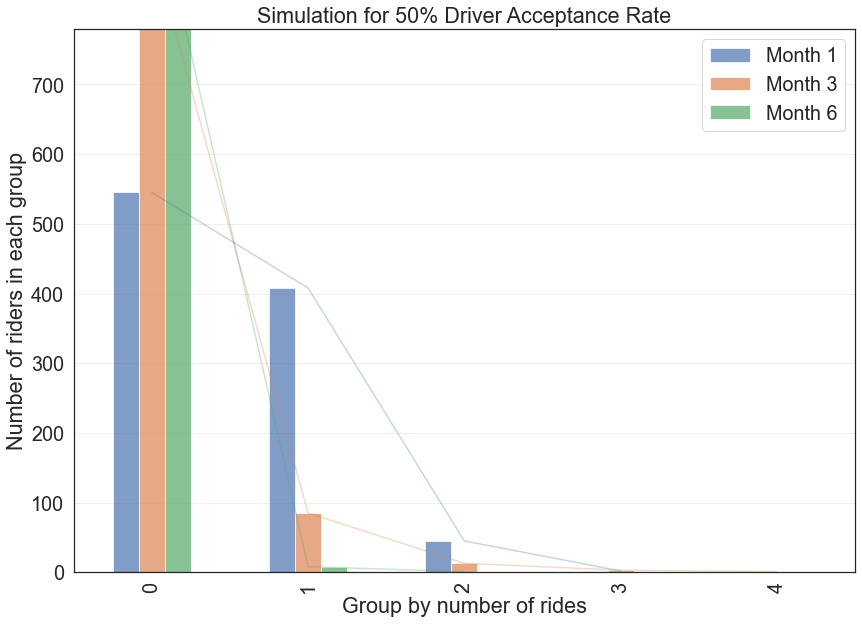

In [ ]:
sns.set(font_scale=1.8)
sns.set_style("white")

# header_cols = ['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11','M12']
ride_stats = pd.read_csv('ride_stats_AR100.csv',index_col=0)
print(ride_stats.head())

fig, ax = plt.subplots(figsize=(14,10))

ride_stats = ride_stats[['0','2','5','11']]
ride_stats.rename(columns={'0':'Month 1', '2':'Month 3', '5':'Month 6', '11':'Month 12'}, inplace=True)

ride_stats.plot.line(alpha=0.3, ax=ax, legend=False)
ride_stats.plot.bar(alpha=0.7, ax=ax, 
                    xlabel='Group by number of rides', 
                    ylabel='Number of riders in each group',
                    title='Simulation for 100% Driver Acceptance Rate',  legend=True)

ax.set_xlim([-0.5, 6.5])
ax.set_ylim([0,780])
plt.grid(True, axis='y', alpha=0.3)
plt.show()

ride_stats = pd.read_csv('ride_stats_AR50.csv',index_col=0)
print(ride_stats)
fig, ax = plt.subplots(figsize=(14,10))

ride_stats = ride_stats[['0','2','5']]
ride_stats.rename(columns={'0':'Month 1', '2':'Month 3', '5':'Month 6', '11':'Month 12'}, inplace=True)

ride_stats.plot.line(alpha=0.3, ax=ax, legend=False)
ride_stats.plot.bar(alpha=0.7, ax=ax, 
                    xlabel='Group by number of rides', 
                    ylabel='Number of riders in each group', 
                    title='Simulation for 50% Driver Acceptance Rate' ,legend=True)

ax.set_xlim([-0.5, 4.5])
ax.set_ylim([0,780])
plt.grid(True, axis='y', alpha=0.3)

plt.show()

In [2]:
# Stripplot
AR = 0.8
rides_sim = simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*AR)
# print(rides_df[[0,2,5,11]])
rides_df=pd.DataFrame(rides_sim, columns=list(range(1,13)))
df = rides_df[list(range(1,13))]

fig, ax = plt.subplots(figsize=(12,6))
sns.stripplot(data=df, size=3, alpha=0.8, palette = 'tab10', jitter=0.25 , edgecolor='gray', orient='v', ax=ax)
ax.grid(True, axis='both', which='both', alpha =0.3)
ax.set(xlabel='Months', ylabel='Grouped number of rides', 
       title='Stripplot visualization of month-to-month ride distribution, AR = {}%'.format(AR*100))
plt.show()

NameError: name 'simulate_riders_array' is not defined

In [ ]:
### OLD CODE ####

# sns.set(font_scale=1.2)
# sns.set_style("white")

# fig, ax = plt.subplots(figsize=(14,10), nrows=3)

# ride_stats['0'].plot.bar(alpha=0.5, ax=ax[0], label='Month 1')
# ride_stats['5'].plot.bar(alpha=0.3, color='green', ax=ax[0], label='Month 6')
# ride_stats['11'].plot.bar( alpha=0.2, color='red', ax=ax[0], label='Month 12')


# for i in range(3): 
#     ax[i].set_xlim([-0.5, 4.5])
#     ax[i].set_ylim([0,600])
#     ax[i].legend()

# # ax[2].set_xlabel("Number of rides")

# plt.show()

In [1369]:
def simulate_monthly_earnings(n_riders=1000, 
                              simulation_runs=10,
                              n_months=12, 
                              driver_pay=np.ones(n_months)*25, 
                              rider_pay=30.0, 
                              verbose=False, 
                              random_seed=None):
    
    AR = acceptance_rate_model(driver_pay)

    rides_array = np.zeros((n_riders, n_months))

    # We can run the simulation more than once and average the results for better statistical convergence
    for _ in range(simulation_runs):
        rides_array += simulate_riders_array(n_riders=n_riders, 
                                             n_months=n_months, 
                                             init_mu=1, 
                                             acceptance_rate=AR, 
                                             random_seed=random_seed)
        
    # divide by number of simulations to get an average, then load it into a DF
    avg_rides_df = pd.DataFrame(rides_array/np.float(simulation_runs))  # avg_rides_df has continuous values instead of integers
    monthly_total_rides = avg_rides_df.sum()  # sums over each month column
    monthly_earnings = monthly_total_rides.values *(rider_pay - driver_pay) 
    
    # prints some useful
    if verbose:
        print('Monthly driver pay:')
        print(np.round(driver_pay,2))
        print('Monthly acceptance rate:')
        print(np.round(AR,2))
    
    return avg_rides_df, monthly_total_rides, monthly_earnings
    

In [1364]:
for i in range(2):
    print(i)

0
1


In [1370]:
sim_months = 5
rider_pay = 30.0
driver_pay=np.linspace(29, 20, sim_months)
print(driver_pay)
print(len(driver_pay))
all_rides = []
all_earnings = []

for _ in range(10):

    avg_rides_df, monthly_total_rides, monthly_earnings = simulate_monthly_earnings(
                                                    n_months=sim_months,
                                                    rider_pay=rider_pay, 
                                                    driver_pay=driver_pay, 
                                                    simulation_runs=200)

    # print(monthly_total_rides)
    total_rides = monthly_total_rides.sum()
    total_earnings = monthly_earnings.sum()
    print('Total rides ({} months):'.format(sim_months), total_rides)
    print('Total earnings ({} months):'.format(sim_months), np.round(total_earnings))
    all_rides.append(total_rides)
    all_earnings.append(total_earnings)
    
print('Avg total rides {} +/- {}'.format(np.mean(all_rides), np.std(all_rides)) )
print('Avg total earnings {} +/- {}'.format(np.mean(all_earnings), np.std(all_earnings)) )
print('Earnings/ride {}'.format(np.mean(all_earnings)/np.mean(all_rides)))
    

[29.   26.75 24.5  22.25 20.  ]
5
Total rides (5 months): 1754.79
Total earnings (5 months): 4775.0
Total rides (5 months): 1749.7550000000012
Total earnings (5 months): 4782.0
Total rides (5 months): 1747.909999999999
Total earnings (5 months): 4765.0
Total rides (5 months): 1748.7100000000014
Total earnings (5 months): 4774.0
Total rides (5 months): 1750.1400000000015
Total earnings (5 months): 4779.0
Total rides (5 months): 1758.1949999999995
Total earnings (5 months): 4802.0
Total rides (5 months): 1747.0800000000002
Total earnings (5 months): 4762.0
Total rides (5 months): 1763.5899999999995
Total earnings (5 months): 4817.0
Total rides (5 months): 1751.7349999999997
Total earnings (5 months): 4791.0
Total rides (5 months): 1757.4750000000006
Total earnings (5 months): 4804.0
Avg total rides 1752.9380000000006 +/- 5.118553115871418
Avg total earnings 4785.126875 +/- 16.844402076894568
Earnings/ride 2.729775311505597


In [1770]:
avg_rides_df

,0,1,2,3,4
0,0.910,0.645,0.290,0.070,0.005
1,0.825,0.565,0.250,0.090,0.005
2,0.845,0.570,0.265,0.080,0.000
3,0.885,0.575,0.265,0.080,0.020
4,0.855,0.505,0.265,0.085,0.020
...,...,...,...,...,...
995,0.845,0.615,0.260,0.060,0.010
996,0.860,0.655,0.330,0.100,0.015
997,0.770,0.515,0.240,0.065,0.010
998,0.810,0.580,0.295,0.075,0.015


In [1599]:
def profit_optimizer(driver_pay, rider_pay=30.0, simulation_runs=50, verbose=False):
    sim_months = len(driver_pay)

    
    all_rides = []
    all_earnings = []

    for _ in range(10):

        rides_df, monthly_total_rides, monthly_earnings = simulate_monthly_earnings(
                                                        n_months=sim_months,
                                                        rider_pay=rider_pay, 
                                                        driver_pay=driver_pay, 
                                                        simulation_runs=simulation_runs)

        total_rides = monthly_total_rides.sum()
        total_earnings = monthly_earnings.sum()

        all_rides.append(total_rides)
        all_earnings.append(total_earnings)
        
        if verbose:
            print('Total rides ({} months):'.format(sim_months), total_rides)
            print('Total earnings ({} months):'.format(sim_months), np.round(total_earnings))

    if verbose:
        print('Driver pay: {}'.format(driver_pay))
        print('{} months'.format(sim_months))
        print('Avg total rides {} +/- {}'.format(np.mean(all_rides), np.std(all_rides)) )
        print('Avg total earnings {} +/- {}'.format(np.mean(all_earnings), np.std(all_earnings)) )
        print('Earnings/ride {}'.format(np.mean(all_earnings)/np.mean(all_rides)))
    
    return np.mean(all_rides), np.mean(all_earnings)

In [1576]:
np.concatenate([np.arange(0,1,0.2),np.arange(1,10)])

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 2. , 3. , 4. , 5. , 6. , 7. , 8. ,
       9. ])

In [1600]:
# initialize empty lists and driver_pay array for simulation
pay=[]
rides=[]
earnings=[]
driver_pay = np.concatenate([np.arange(15,24,3), np.arange(24,26,2), np.arange(26,28,0.2), np.arange(28,31,2)])

n_months=6 
for i, d in enumerate(driver_pay):
    
    avg_rides, avg_earnings = profit_optimizer(np.ones(n_months)*d, rider_pay=30)
    pay.append(d)
    rides.append(avg_rides)
    earnings.append(avg_earnings)
    print(np.round(pay[i], 2), np.round(rides[i], 2), np.round(earnings[i], 2))


15.0 21.34 320.04
18.0 61.55 738.6
21.0 212.78 1915.0
24.0 667.81 4006.88
26.0 1573.69 6294.78
26.2 1686.99 6410.57
26.4 1785.94 6429.37
26.6 1891.96 6432.65
26.8 1993.12 6377.99
27.0 2094.88 6284.63
27.2 2192.23 6138.25
27.4 2288.86 5951.04
27.6 2390.61 5737.46
27.8 2486.92 5471.22
28.0 2598.75 5197.5
30.0 3657.7 0.0


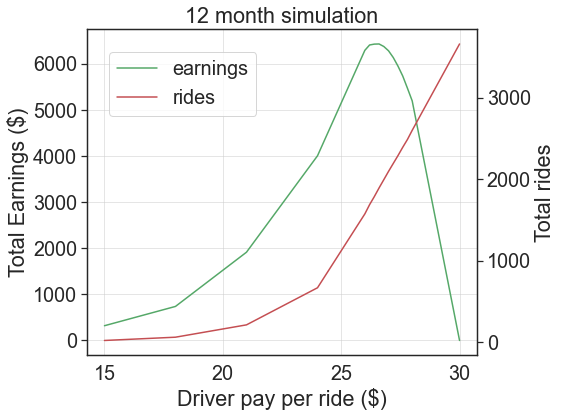

In [1606]:
fig, ax1 = plt.subplots(figsize = (7,6))
ax2 = ax1.twinx()

ax1.plot(pay, earnings, label='earnings', color = 'g')
ax2.plot(pay, rides, label='rides', color = 'r')
ax1.set_xlabel('Driver pay per ride ($)')
ax1.set_ylabel('Total Earnings ($)')
ax2.set_ylabel('Total rides')
ax1.set_title('12 month simulation')

fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))
ax1.grid(True, alpha=0.5)
plt.show()

In [1589]:
# print(pay, earnings, rides)
data_dict= {'pay':pay, 'rides': rides, 'earnings': earnings}
# print(data_dict)

In [1590]:
m12_earnings_sim = pd.DataFrame(data_dict)
m12_earnings_sim.to_csv('m12_earnings_sim.csv')
print(m12_earnings_sim)

     pay     rides   earnings
0   15.0    21.706   326.8950
1   17.0    41.420   541.8400
2   19.0    93.282  1025.8380
3   21.0   213.593  1921.4010
4   23.0   439.841  3076.1010
5   24.0   669.211  4000.4520
6   25.0  1074.947  5355.2750
7   26.0  1663.686  6654.7200
8   26.2  1788.448  6792.8116
9   26.4  1925.263  6924.6468
10  26.6  2053.622  6974.9980
11  26.8  2181.753  6999.8784
12  27.0  2307.408  6958.2180
13  27.2  2459.861  6861.6296
14  27.4  2593.302  6737.7934
15  27.6  2728.804  6537.1056
16  27.8  2886.827  6328.3440
17  28.0  3016.570  6034.5620
18  29.0  3866.802  3877.8400
19  30.0  4852.074     0.0000


In [1623]:
# simulating dynamic pay structures

# initialize empty lists and driver_pay array for simulation
pay=[]
rides=[]
earnings=[]

n_months=6 

driver_pays =[np.linspace(28, 25.5, n_months),
              np.linspace(27.5, 25.5, n_months),
              np.linspace(27, 25.5, n_months),
              np.linspace(26.5, 25.5, n_months),
              np.linspace(26, 25.5, n_months)]

optimal_driver_pay = np.linspace(27, 25.5, n_months)

for i, dp in enumerate(driver_paysnjh):
    print(dp)
    avg_rides, avg_earnings = profit_optimizer(dp, rider_pay=30)
    pay.append(dp)
    rides.append(avg_rides)
    earnings.append(avg_earnings)
    print(np.round(rides[i], 2), np.round(earnings[i], 2))


27.0


TypeError: object of type 'numpy.float64' has no len()

In [1112]:
acceptance_rate_model(24.8)

0.4966250512568784

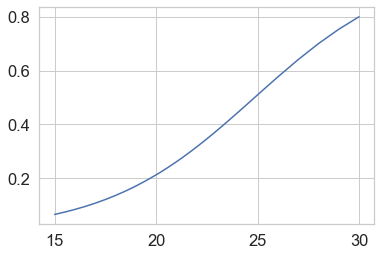

In [1110]:
plt.plot(driver_pay, acceptance_rate_model(driver_pay))
plt.show()

## Attempt at using scipy.optimize.minimize

In [1059]:

from scipy.optimize import minimize

# x_start = np.array([30.,30.,28.,22.])
x_start = np.ones(3)*28.0
print(x_start)
bounds = [(20.0, 30.0), (20.0, 30.0),(20.0, 30.0)]

results = minimize(profit_optimizer, x_start,
                  bounds = bounds)

[28. 28. 28.]


In [1060]:
print(results)

      fun: 26692.54108824434
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.22980097e+09, 5.66000641e+08, 1.35300064e+09])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 164
      nit: 1
     njev: 41
   status: 2
  success: False
        x: array([27.99999946, 27.99999946, 27.99999946])


In [757]:
old_code = 0
if old_code:
    
    # the nth element of each array represents a rider

    def simulate_riders(n_riders=1000, init_mu=1, n_months=12, random_seed=42):

        init_r = poisson.rvs(mu=np.ones(n_riders)*init_mu, size=n_riders, random_state=random_seed)
        rider_sim = [init_r]

        for i in range(n_months-1):

            # feeds the previous array into the mu
            r = poisson.rvs(mu=rider_sim[i], size=n_riders) 
            rider_sim.append(r)

        return rider_sim

    rider_sim =simulate_riders(n_riders=40, init_mu=1)
    print(rider_sim)
    
    n_riders=1000
    n_months = 12
    # rider_sim is a list of 12 months with arrays of n_riders
    rider_sim = simulate_riders(n_riders = n_riders, init_mu=1, n_months=n_months, random_seed=42)

    # load rider_sim into DataFrame. Months are index. Riders are columns.
    rider_df = pd.DataFrame(rider_sim, index=range(1,n_months+1))

    # transpose the list of arrays

    # rider_sim_T is a list of n_riders with arrays of 12
    rider_sim_T = []

    for i in range(len(rider_sim[0])):
        rider_sim_T.append(rider_df[i].values) #extract the array of each rider
    #     plt.plot(rider_df[i].values, linewidth=0.8)

    # plt.ylabel('# of matched rides')
    # plt.xlabel('# of months')    
    # plt.show()

    print('Total rides & rides per rider per month:')
    for i, rs in enumerate(rider_sim):
        print((np.sum(rs), np.mean(rs)))

    # Plotting the random walk

    # fig, ax = plt.subplots(figsize=(10,10))

    # for rs in rider_sim_T:
    #     plt.plot(rs, linewidth=0.8)
    # plt.ylabel('# of rides')
    # plt.xlabel('# of months')    
    # plt.show()

    # fig, ax = plt.subplots(12,1, figsize=(10,30), sharex=True, sharey=True)
    # for i, rs in enumerate(rider_sim):
    #     ax[i].hist(rs)

    rider_df_T=rider_df.T
    print('Cumalitve number of lost customers')
    rider_df_T[rider_df_T==0].count()

# Simulate using non-random poisson.pmf

In [ ]:
n=1000
n_months = 12

# k represents the number of rides, it's to be inputted into poisson.pmf
# k=40 is a bit high, but it doesn't hurt to overestimate 
k_range = list(range(40)) 
print("k_range: ", k_range)

# initial distribution of first 1000 riders' request
A_init = np.round(n*poisson.pmf(k=k_range, mu=1), 4)

L = [A_init] 
Requests = A_init*k_range
print(np.round(Requests))


for m in range(n_months-1):
    
    A = np.zeros(len(k_range))
    
    for i in k_range:
        
        A += np.round(L[m][i]*poisson.pmf(k=k_range, mu=i), decimals=4)
    
    L.append(A)
#     print(A)
#     print(A.sum())

In [ ]:
print(np.round(Requests))

Requests[1]


In [ ]:
for m in range(12):
#     print(np.round(L[m].sum(),0))
    print(np.round(L[m][:30]))

In [ ]:
# Total Number of Rides per month

# print(np.round(L[0]))
rides_total= 0
for m in range(n_months):    
    rides_per_group = np.round(L[m])*k_range
#     print(rides_per_group)
    
    rides_total += np.sum(rides_per_group)
    print(np.sum(rides_per_group), rides_total)
    
print('rides_total=', rides_total)